In [76]:
import pandas as pd
from fairlearn.metrics import MetricFrame, demographic_parity_difference, equalized_odds_difference, selection_rate, false_positive_rate_difference, false_negative_rate_difference, true_positive_rate_difference, true_negative_rate_difference
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
!pip install fairlearn

In [2]:
de_ensemble_predictions = pd.read_csv('/kaggle/input/ensemble-results/ensemble_predictions_de.csv')
en_ensemble_predictions = pd.read_csv('/kaggle/input/ensemble-results/ensemble_results_en.csv')
es_ensemble_predictions = pd.read_csv('/kaggle/input/ensemble-results/model_predictions_paul.csv')

In [32]:
de_ensemble_predictions.head()
de_ensemble_predictions = de_ensemble_predictions.rename(columns={'sensitive_feature': 'sensitive_features'})

In [33]:
en_ensemble_predictions['sensitive_features'] = 'en'
en_ensemble_predictions.head()

,Unnamed: 0,true_labels,majority_preds,sensitive_feature,sensitive_features
0,0,0,0,en,en
1,1,0,1,en,en
2,2,0,0,en,en
3,3,0,1,en,en
4,4,0,0,en,en


In [34]:
es_ensemble_predictions['sensitive_features'] = 'es'
es_ensemble_predictions.head()

,bert,distilbert,xlm_roberta,distilbert_all,ensemble,true_label,sensitive_feature,sensitive_features
0,0,0,0,0,0,0,es,es
1,0,1,0,0,0,0,es,es
2,0,0,0,0,0,0,es,es
3,0,0,0,0,0,0,es,es
4,0,0,0,0,0,0,es,es


In [35]:
en_df = pd.DataFrame(columns=['true_label', 'predicted_label', 'sensitive_features'])
es_df = pd.DataFrame(columns=['true_label', 'predicted_label', 'sensitive_features'])

In [36]:
en_df['sensitive_features'] = en_ensemble_predictions['sensitive_features']
en_df['true_label'] = en_ensemble_predictions['true_labels']
en_df['predicted_label'] = en_ensemble_predictions['majority_preds']

es_df['sensitive_features'] = es_ensemble_predictions['sensitive_features']
es_df['true_label'] = es_ensemble_predictions['true_label']
es_df['predicted_label'] = es_ensemble_predictions['ensemble']

In [47]:
general_df = pd.concat([de_ensemble_predictions, en_df, es_df])
de_en_df = pd.concat([de_ensemble_predictions, en_df])
de_es_df = pd.concat([de_ensemble_predictions, es_df])
en_es_df = pd.concat([en_df, es_df])

In [64]:
def evaluate(df):
    metric_frame = MetricFrame(
        metrics={
            'accuracy': accuracy_score,
            'precision': precision_score,
            'recall': recall_score,
            'f1_score': f1_score,
            'selection_rate': selection_rate,
        },
        y_true=df['true_label'],
        y_pred=df['predicted_label'],
        sensitive_features=df['sensitive_features']
    )
    
    print("--- Metric frame ---")
    display(metric_frame.by_group)
    
    print("Demographic Parity Difference:", demographic_parity_difference(df['true_label'], df['predicted_label'], sensitive_features=df['sensitive_features']))
    print("Equality of Opportunity (TPR diff):", equalized_odds_difference(df['true_label'], df['predicted_label'], sensitive_features=df['sensitive_features']))
    print("False Positive Rate Difference:", false_positive_rate_difference(df['true_label'], df['predicted_label'], sensitive_features=df['sensitive_features']))
    print("False Negative Rate Difference:", false_negative_rate_difference(df['true_label'], df['predicted_label'], sensitive_features=df['sensitive_features']))
    print("True Positive Rate Difference:", true_positive_rate_difference(df['true_label'], df['predicted_label'], sensitive_features=df['sensitive_features']))
    print("True Negative Rate Difference:", true_negative_rate_difference(df['true_label'], df['predicted_label'], sensitive_features=df['sensitive_features']))

In [65]:
evaluate(general_df)

--- Metric frame ---


,accuracy,precision,recall,f1_score,selection_rate
sensitive_features,,,,,
de,0.826500,0.822310,0.8330,0.827620,0.506500
en,0.822706,0.843900,0.7920,0.817127,0.469367
es,0.844500,0.896889,0.7785,0.833512,0.434000


Demographic Parity Difference: 0.07249999999999995
Equality of Opportunity (TPR diff): 0.0905
False Positive Rate Difference: 0.0905
False Negative Rate Difference: 0.05449999999999999
True Positive Rate Difference: 0.05449999999999999
True Negative Rate Difference: 0.09050000000000002


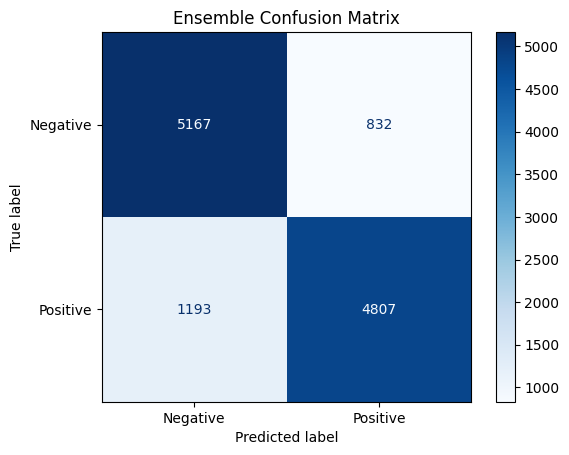

In [78]:
cm = confusion_matrix(general_df['true_label'], general_df['predicted_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Ensemble Confusion Matrix")
plt.show()